In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt

import env

In [2]:
mpg = data('mpg')

In [3]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 1. Load the mpg dataset and anser the following:

- On average, which manufacturer has the best miles per gallon?
- How many different manufacturers are there?
- How many different models are there?
- Do automatic or manual cars have better miles per gallon?

In [4]:
# mpg['avg_mpg_per_manufacturer'] = ((mpg.cty + mpg.hwy) / 2)
mpg.groupby('manufacturer')['cty', 'hwy'].mean().sort_values(by = 'hwy')
# Honda has the best mpg

,cty,hwy
manufacturer,,
land rover,11.500000,16.500000
lincoln,11.333333,17.000000
jeep,13.500000,17.625000
dodge,13.135135,17.945946
mercury,13.250000,18.000000
ford,14.000000,19.360000
chevrolet,15.000000,21.894737
nissan,18.076923,24.615385
toyota,18.529412,24.911765


In [5]:
# mpg['manufacturer'].unique().tolist() # make a list of the unique values of the manufacturer column
# len(mpg['manufacturer'].unique().tolist()) # count the total unique values
mpg.manufacturer.nunique() # this counts all the unique values 

15

In [6]:
# This is the amount of unique models within the mpg DataFrame

# len(mpg['model'].unique().tolist())
mpg.model.nunique()

38

In [7]:
# agg for all types of cars

mpg.groupby('trans').(['min', 'mean', 'max'])

SyntaxError: invalid syntax (<ipython-input-7-db1d04d33f7d>, line 3)

### 2. Joining and Merging

> Copy the `users` and `roles` dataframes from the obove examples. 

- What do you think the folling join(s) will look like:
    - `right`
    - `outer`

In [8]:
# copy users
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

# copy roles
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [9]:
# left join

pd.merge(users, roles, left_on = 'role_id',right_on = 'id', how = 'left')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [10]:
pd.merge(users, roles, left_on = 'role_id',right_on = 'id', how = 'right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


- What happens if you drop the foreign keys from the dataframes and try to merge them?

In [11]:
users.drop(['role_id'], axis = 1)

,id,name
0,1,bob
1,2,joe
2,3,sally
3,4,adam
4,5,jane
5,6,mike


In [12]:
roles.drop(['id'], axis = 1)

,name
0,admin
1,author
2,reviewer
3,commenter


In [13]:
# since there is nothing these DataFrames have in common we will get an error
pd.merge(users, roles, left_on = 'id',right_on = 'name', how = 'left')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

### 3. Getting `data` from `SQL` databases

   a. create a function names `get_db_url`

It should accept username, hostname, password, and database and return a url formatted like our

<div class="alert alert-block alert-info">
<b>Example:</b> mysql+pymysql://codeup:p@assw0rd@123.123.123.123/some_db
</div>

In [2]:
def get_db_url(username, hostname, password, dbname) -> str:
    url = 'mysql+pymysql://{}:{}@{}/{}'
    return url.format(username, password, hostname, dbname)

In [8]:
def get_db_url(dbname) -> str:
    url = 'mysql+pymysql://{}:{}@{}/{}'
    return url.format(env.user, env.password, env.host, dbname)

In [9]:
employees_url = get_db_url('employees')

In [10]:
query = '''
SELECT *
FROM employees
LIMIT 20
'''

pd.read_sql(query, employees_url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [6]:
def get_db_url(host, user, password, database):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
url = get_db_url(host, user, password, 'employees')

NameError: name 'host' is not defined

b. Use function to connect with the `employees` database

In [11]:
pd.read_sql('SELECT * FROM employees', url)

NameError: name 'url' is not defined

c. Run the following queries         

- intentionally make a typo in the database url. What kind of error message do you see?

In [16]:
# url = get_db_url(host, user, password, 'employeees')
# pd.read_sql('SELECT * FROM employees', url)

# Here is the error

In [17]:
OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'curie_945'@'%' to database 'employeees'")
(Background on this error at: http://sqlalche.me/e/e3q8)

SyntaxError: invalid syntax (<ipython-input-17-e1043feb54fa>, line 2)

- Intentionally make an error in your SQL query. What does the error message look like?

d. Read the `employees` and `titles` tables into two separate dataframes

In [18]:
# employees tables

employees = pd.read_sql('SELECT * FROM employees', url)
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [19]:
# titles

titles = pd.read_sql('SELECT * FROM titles', url)
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


e. Visualize the number of employees with each title.

In [8]:
titles.title.value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

f. Join the `employees` and `titles` dataframes together

In [9]:
employees_and_titles = pd.merge(employees, titles, left_on = 'emp_no', right_on = 'emp_no', how = 'left')
employees_and_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


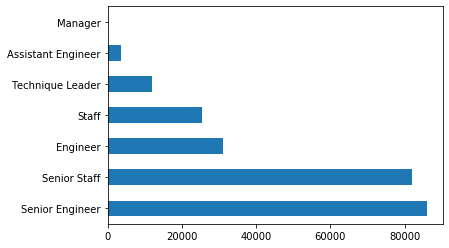

In [29]:
# WHERE to_date > NOW()
titles\
    [titles.to_date == titles.to_date.max()]\
    .title\
    .value_counts()\
    .plot.barh()

g. Visualize how frequently employees change titles.

h. For each title, find the hire date of the employee that was hired most recently with that title

In [28]:
titles.emp_no.value_counts().value_counts()

1    159754
2    137256
3      3014
Name: emp_no, dtype: int64

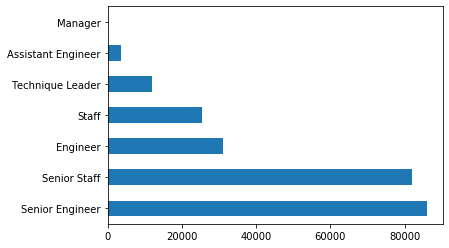

In [30]:
# WHERE to_date > NOW()
(titles
 [titles.to_date == titles.to_date.max()]
 .title
 .value_counts()
 .plot.barh())

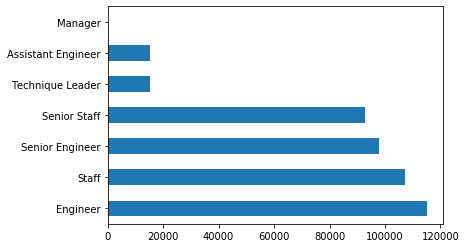

In [31]:
titles.title.value_counts().plot.barh()

i. Write the code necessary to create a cross tabulation of the number of titles by department. 

<div class="alert alert-block alert-info">
<b>Hint:</b> this will involve a combination of SQL and python/pandas code
</div>

In [32]:
df = employees.set_index('emp_no').join(titles.set_index('emp_no'))
df

,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
emp_no,,,,,,,,
10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...
499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01


### 4. Use your `get_db_url` function to help you explore the data from the `chipotle` database. Use the data to answer the following questions:


- What is the total price for each order?

- What are the most popular 3 items?

- Which item has produced the most revenue?